# <center><u>RUN SWING SOLEIL octobre24</u></center>

In [1]:

from SwingTools import extract_from_h5 as extract
from SwingTools import integrate as integ
from SwingTools import save_exported_data

from matplotlib import pyplot as plt
import numpy as np
import fabio
import glob
import os

- Extract data from *.h5 file

In [2]:
data_folder = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/dryed_cappilary/'
file = data_folder+'rodriguez_10448_2024-10-14_02-17-36.h5'

In [3]:
sample_name, eiger, basler_image, position, params, time_stamps, transmission = extract(file,print_output=True)

Sample Name --> C1_1
Taille Eiger --> (6, 1083, 1035)
Taille Basler --> (1024, 1024)
Positions --> {'X_start': array([53.0002]), 'X_end': array([53.0002]), 'Z_start': array([96.7003]), 'Z_end': array([96.7003])}
Params --> {'WaveLength': 1.0332090578339936, 'Center_1': 283.5023430636491, 'Center_2': 93.444886362309, 'PixSize_x': 7.5e-05, 'PixSize_z': 7.5e-05, 'SampleDistance': 0.8555692532100001, 'Dim_1': 1083, 'Dim_2': 1035, 'ExposureTime': 1, 'Binning_1': 2, 'Binning_2': 2}
Time_stamps --> [[1.41192198]
 [3.07630301]
 [4.79020286]
 [6.5454309 ]
 [8.23705101]
 [9.94724798]]
Transmission --> [0.44755311 0.44763207 0.44806943 0.44821087 0.44826075 0.448663  ]


- Plot Basler Image

''

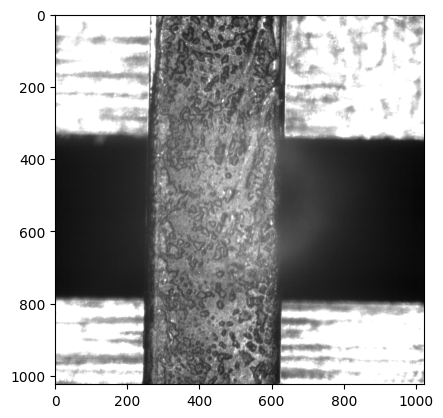

In [4]:
fig,ax = plt.subplots()
ax.imshow(basler_image,cmap='gray')
;


- Plot Eiger

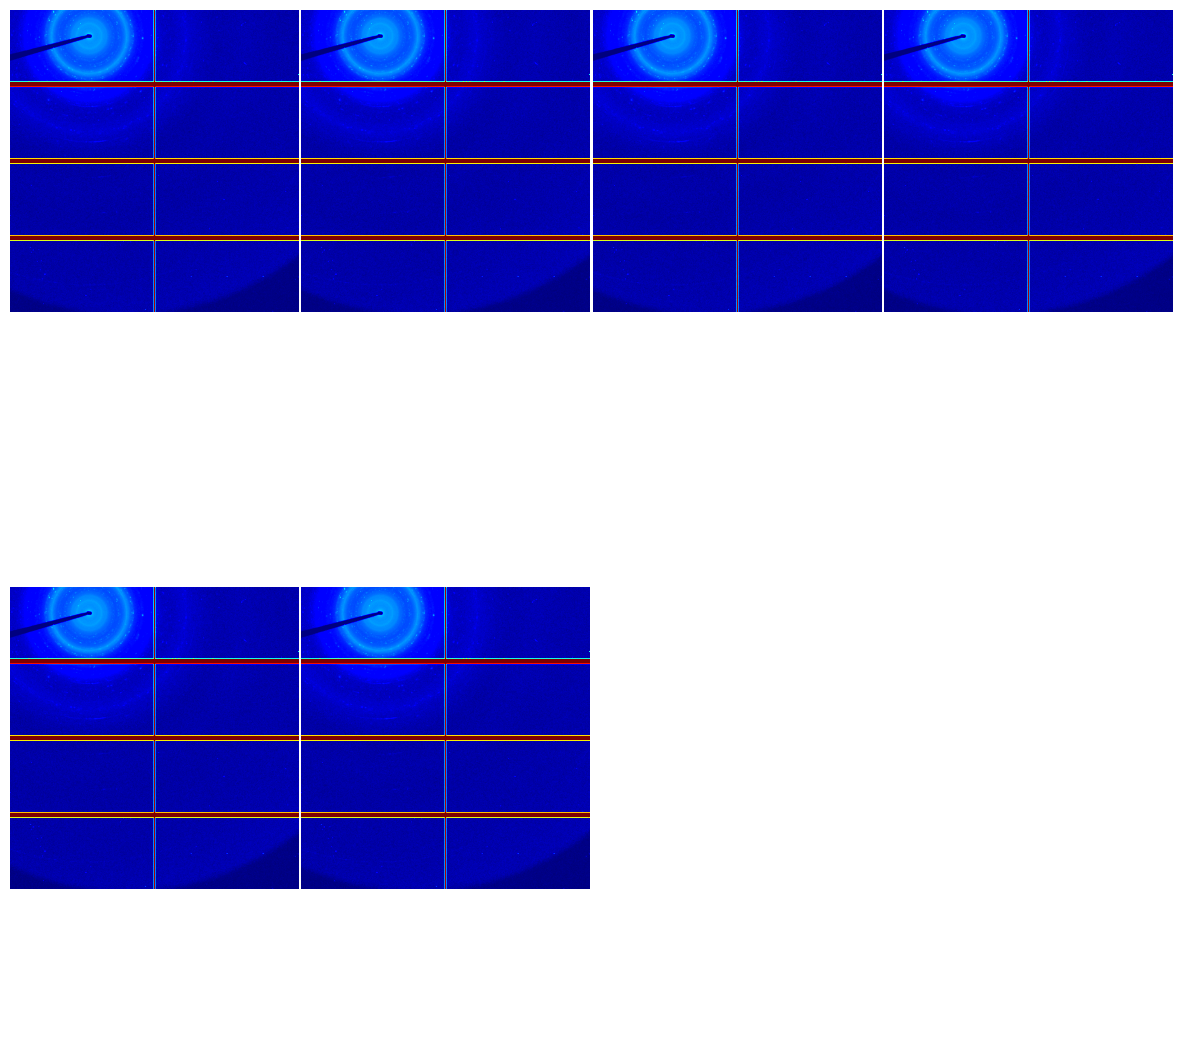

In [5]:

# Calculate the number of rows and columns for the subplots
n_images, height, width = eiger.shape
n_cols = 4
n_rows = (n_images + n_cols - 1) // n_cols

# Create a figure and axis array
fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Loop over the images and plot them on subplots
for i in range(n_images):
    row = i // n_cols
    col = i % n_cols
    ax[row, col].imshow(np.log1p(eiger[i]), cmap='jet')
    ax[row, col].axis('off')  # Remove axis ticks and labels

# Remove any empty subplots
for j in range(n_images, n_rows * n_cols):
    row = j // n_cols
    col = j % n_cols
    ax[row, col].axis('off')

# Adjust the spacing between subplots

plt.subplots_adjust(wspace=0.01, hspace=0)

plt.show()

- Integration Iso

In [6]:
pixel_size_x = params['PixSize_x']
pixel_size_z = params['PixSize_z']
bin_x = params['Binning_1']
bin_y = params['Binning_2']
distance_m = params['SampleDistance']
x_center = params['Center_1']
z_center = params['Center_2']
wl = params['WaveLength']
maskdata = 'None'

nbins = 1000            #??????????????
unit_type = "q_A^-1"    #??????????????
#mask = 

- Integration of image eiger[0] without mask

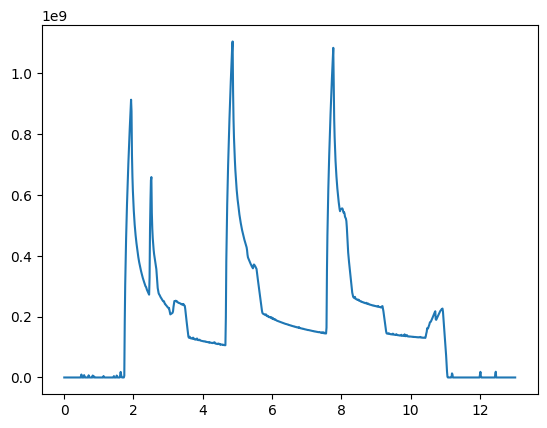

In [7]:
q_iso,i_iso = integ(eiger[0],pixel_size_x,pixel_size_z,bin_x,bin_y,distance_m,x_center, z_center,unit_type,nbins,wl)
fig,ax = plt.subplots()
ax.plot(q_iso,i_iso)

- Integration of image eiger[0] with mask

In [8]:
maskfile = 'mask.edf'
mask=fabio.open(maskfile)
maskdata=mask.data

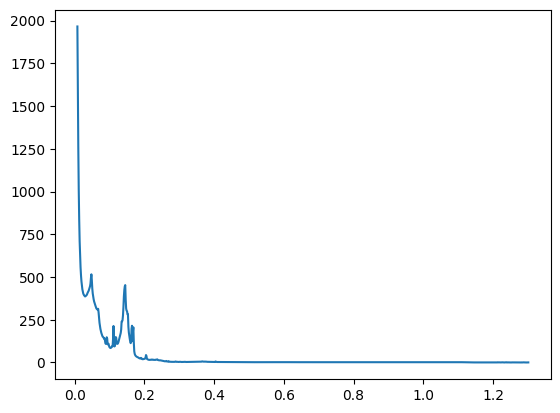

In [9]:
q_iso,i_iso = integ(eiger[0],pixel_size_x,pixel_size_z,bin_x,bin_y,distance_m,x_center, z_center,unit_type,nbins,wl,maskdata)
fig,ax = plt.subplots()
ax.plot(q_iso,i_iso);

In [10]:
integration = np.array([q_iso,i_iso])
print(integration.shape)

(2, 1000)


- Save data to files

In [11]:
# Get a list of all .h5 files in the data_folde
h5_files = glob.glob(data_folder + '/*.h5')
print(h5_files)

for i,file in enumerate (h5_files):
    output_base = os.path.basename(h5_files[i]).replace('.h5', '')
    print(output_base)

['C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/dryed_cappilary\\rodriguez_10448_2024-10-14_02-17-36.h5', 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/dryed_cappilary\\rodriguez_10449_2024-10-14_02-17-52.h5', 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/dryed_cappilary\\rodriguez_10450_2024-10-14_02-18-07.h5', 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/dryed_cappilary\\rodriguez_10451_2024-10-14_02-18-27.h5', 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/dryed_cappilary\\rodriguez_10452_2024-10-14_02-18-45.h5', 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/dryed_cappilary\\rodriguez_10453_2024-10-14_02-19-02.h5', 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synch

In [13]:
save_exported_data(file, data_folder,sample_name, eiger, basler_image, position, params, time_stamps, transmission, integration)

- continuer la fonction save_exported_data dans SwingTools pour les autres fichiers numpy et txt
- Quel argument garder entre file et data_dir
- ajouter possibilité de moyenne sur tous les frames
- integrer dans des boucles